In [2]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

from src.spike_utils import *

%load_ext autoreload
%autoreload 2

In [3]:
np.random.seed(11)
NUM_SAMPLES = 10000
NUM_SPIKES = 4
SPIKE_TIME_MULTIPLIER = 1

In [4]:
# create spikes
spikes = n_uniform_spikes(NUM_SPIKES) * SPIKE_TIME_MULTIPLIER
isi_arr = spikes[1:] - spikes[:-1]
spikes

array([0.01947524, 0.18026969, 0.46321853, 0.72493393])

In [5]:
# compute fourier transform
fourier_vals, frequencies = compute_fourier_freq_profile(spikes, num_samples=NUM_SAMPLES)
magnitudes_freqs = abs(fourier_vals)

Text(0.5, 1.0, 'original spike train')

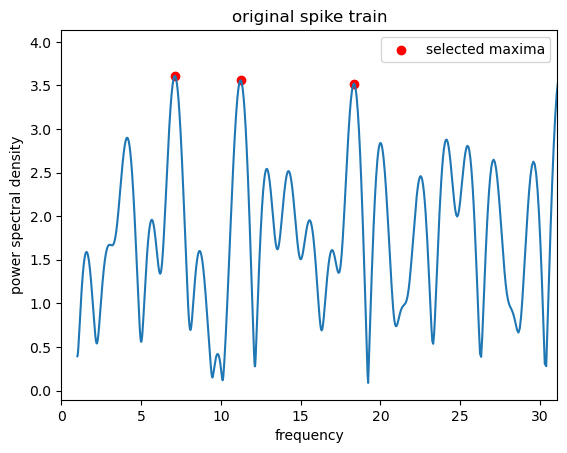

In [31]:
# plot fourier transform
plt.plot(frequencies, magnitudes_freqs)
plt.xlabel('frequency')
plt.ylabel('power spectral density')


# plot maxima of fourier transform
peak_freqs, peak_indices = peak_freq_components(spikes, magnitudes_freqs,
                                                frequencies, limited_indices=[0,1, 2],
                                                eps=0.5)
plt.scatter(peak_freqs, magnitudes_freqs[peak_indices], label='selected maxima', color='red')

plt.legend()
plt.xlim(0, min(1/isi_arr[0] * 5, NUM_SAMPLES))
plt .title('original spike train')

In [32]:
time = np.linspace(0, 1, NUM_SAMPLES)
spike_signal = compute_spike_signal(spikes, NUM_SAMPLES)
frequencies_to_plot = peak_freqs

wave_signal_sum = np.zeros(NUM_SAMPLES)

for idx, freq in enumerate(frequencies_to_plot):
    wave_signal = compute_wave(freq, spikes, NUM_SAMPLES)
    wave_signal_sum += wave_signal * abs(spike_fourier(spikes, freq))

Text(0.5, 1.0, 'original spike train')

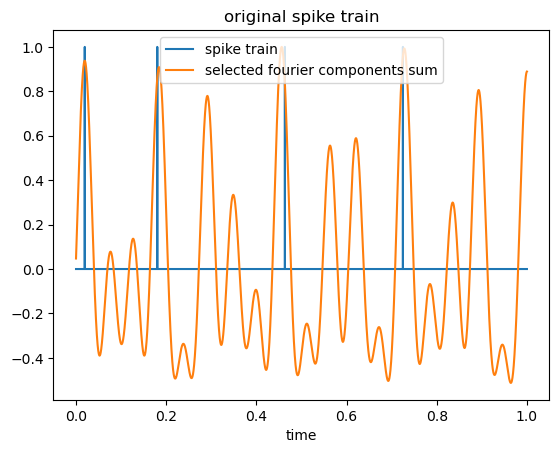

In [33]:
plt.plot(time, spike_signal, label='spike train')
plt.plot(time, wave_signal_sum / max(wave_signal_sum), label=f'selected fourier components sum')
plt.xlabel('time')
plt.legend()
plt .title('original spike train')

Creating individual images...


100%|█████████████████████████████████████████| 300/300 [00:55<00:00,  5.44it/s]


Creating gif...


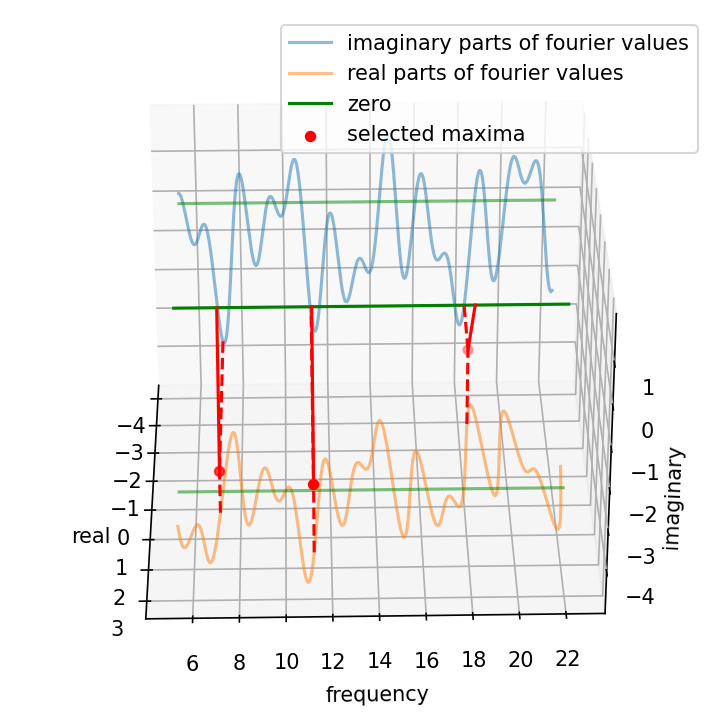

In [17]:
ax = plot_3d_fourier_peaks(spikes, peak_indices, fourier_vals, frequencies, fix_legend_position='upper right')
create_gif(ax, plt.gcf(), 20, 300, 'plot.gif')

Text(0.5, 1.0, 'reduced spike train')

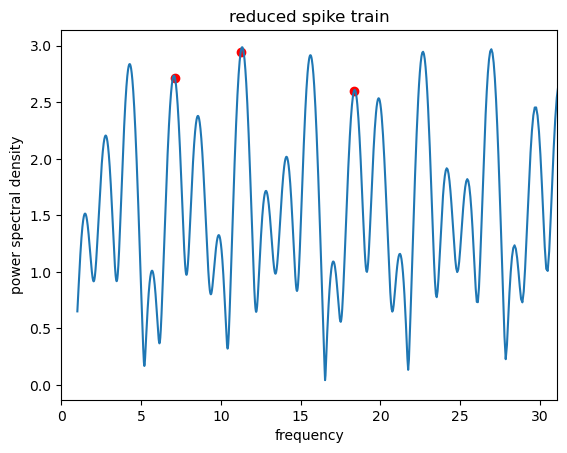

In [34]:
spikes_lite = np.delete(spikes, 1)



fourier_vals_lite, frequencies_lite = compute_fourier_freq_profile(spikes_lite, num_samples=NUM_SAMPLES)
magnitudes_freqs_lite = abs(fourier_vals_lite)

# plot fourier transform
plt.plot(frequencies_lite, magnitudes_freqs_lite)
plt.xlabel('frequency')
plt.ylabel('power spectral density')

# plot maxima from full spike train
plt.scatter(peak_freqs, magnitudes_freqs_lite[peak_indices], label='selected maxima', color='red')

plt.xlim(0, min(1/isi_arr[0] * 5, NUM_SAMPLES))
plt .title('reduced spike train')

/var/folders/99/scv9lj4s4vgdsc2mp350clcc0000gn/T/ipykernel_33405/405901624.py:65: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


Creating individual images...


100%|█████████████████████████████████████████| 300/300 [00:49<00:00,  6.11it/s]


Creating gif...


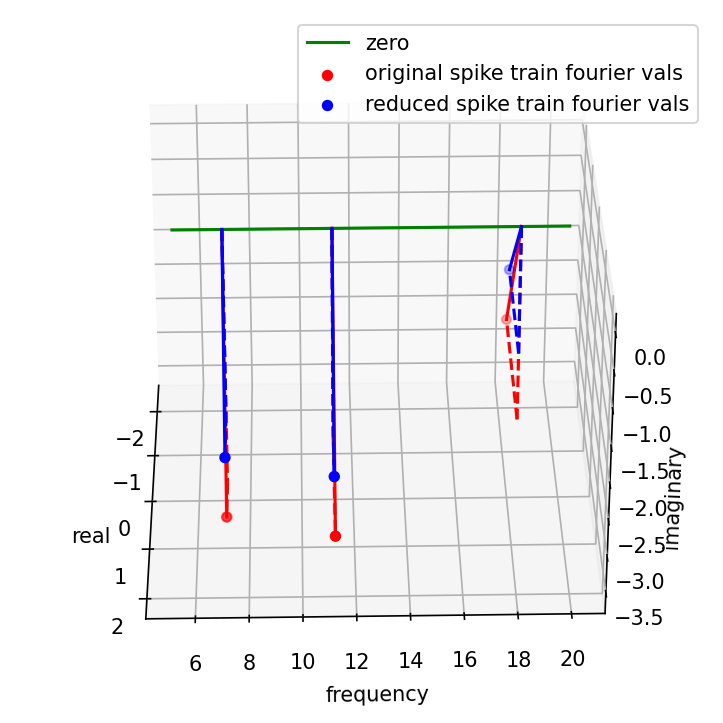

In [35]:
ax = plt.figure(figsize=(8, 6), dpi=150).add_subplot(projection='3d')

plot_indices = range(peak_indices[0] - 500,
                         peak_indices[-1] + 50)

ax.plot([0, 0],
            frequencies[[plot_indices[0], plot_indices[-1]]],
            [0, 0], 
            alpha=1.0,
            label='zero', color='green')

# dots at peaks in fourier space
ax.scatter(fourier_vals[peak_indices].real,
           frequencies[peak_indices],
           fourier_vals[peak_indices].imag,
           label='original spike train fourier vals', color='red')

# dots at peaks in fourier space
ax.scatter(fourier_vals_lite[peak_indices].real,
           frequencies_lite[peak_indices],
           fourier_vals_lite[peak_indices].imag,
           label='reduced spike train fourier vals', color='blue')

for peak_idx in peak_indices:

        # dashed support lines
        ax.plot([0, fourier_vals[peak_idx].real],
                [frequencies[peak_idx], frequencies[peak_idx]],
                [fourier_vals[peak_idx].imag, fourier_vals[peak_idx].imag], color='red',
                linestyle='--')
        ax.plot([0, 0],
                [frequencies[peak_idx], frequencies[peak_idx]],
                [0, fourier_vals[peak_idx].imag], color='red',
                linestyle='--')

        # solid line pointing to chosen peak
        ax.plot([0, fourier_vals[peak_idx].real],
                [frequencies[peak_idx], frequencies[peak_idx]],
                [0, fourier_vals[peak_idx].imag], color='red',
                linestyle='-')
        
for peak_idx in peak_indices:

        # dashed support lines
        ax.plot([0, fourier_vals_lite[peak_idx].real],
                [frequencies_lite[peak_idx], frequencies_lite[peak_idx]],
                [fourier_vals_lite[peak_idx].imag, fourier_vals_lite[peak_idx].imag], color='blue',
                linestyle='--')
        ax.plot([0, 0],
                [frequencies_lite[peak_idx], frequencies_lite[peak_idx]],
                [0, fourier_vals_lite[peak_idx].imag], color='blue',
                linestyle='--')

        # solid line pointing to chosen peak
        ax.plot([0, fourier_vals_lite[peak_idx].real],
                [frequencies_lite[peak_idx], frequencies_lite[peak_idx]],
                [0, fourier_vals_lite[peak_idx].imag], color='blue',
                linestyle='-')

ax.view_init(30, 50)
plt.legend(loc='upper right')
ax.set_xlabel('real')
ax.set_ylabel('frequency')
ax.zaxis.labelpad=0
ax.dist = 11
ax.set_zlabel('imaginary', linespacing=3.4, rotation=90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
create_gif(ax, plt.gcf(), 20, 300, 'plot2.gif')

Text(0.5, 1.0, 'reduced spike train')

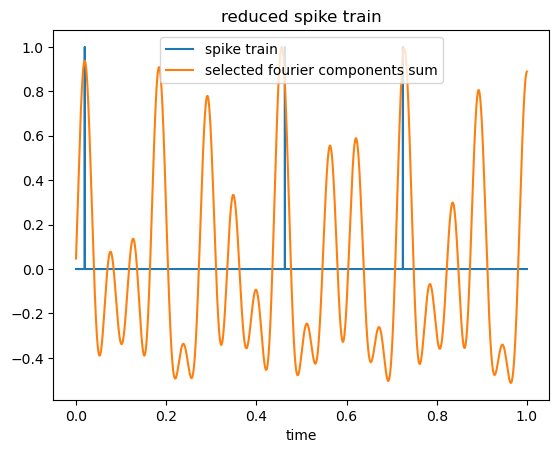

In [29]:
time = np.linspace(0, 1, NUM_SAMPLES)
spike_signal_lite = compute_spike_signal(spikes_lite, NUM_SAMPLES)
frequencies_to_plot = peak_freqs

wave_signal_sum_lite = np.zeros(NUM_SAMPLES)

for idx, freq in enumerate(frequencies_to_plot):
    wave_signal = compute_wave(freq, spikes, NUM_SAMPLES)
    wave_signal_sum_lite += wave_signal * abs(spike_fourier(spikes, freq))
    
plt.plot(time, spike_signal_lite, label='spike train')
plt.plot(time, wave_signal_sum_lite / max(wave_signal_sum_lite), label=f'selected fourier components sum')
plt.xlabel('time')
plt.legend()
plt .title('reduced spike train')